<a href="https://colab.research.google.com/github/Ignitedgene/SC1015-Mini-Project/blob/main/SC1015_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC1015 Mini Project 
<b> Problem Statement: </b> 
  <ul> 
      <li> Given the prevalence of phishing URLs in fraudulent activities, we decided to create a machine learning model to identify whether a URL is legitimate or not. 
  </ul> 

<b> Brief Introduction to Project: </b> 
  <ul>
    <li> During data preparation, we conducted Principal Component Analysis (PCA) to prepare our model inputs. 
    <li> We decided to run the following ML models for our classification problem and evaluate their respective performance:
      <ol>
        <li> Decision Tree (DT) </li>
        <li> Random Forest </li>
        <li> Logistic Regression </li> 
      </ol>
    <li> During Model Training, we ran 2 rounds with the following model inputs:
      <ol>
        <li> PCA components (95% Explained Variance) </li>
        <li> PCA components (95% Explained Variance) + Variables from Feature Selection</li>
      </ol>
    <li> Lastly, we decided to conduct ensembling across the 3 different models to achieve a better prediction and performance.
    </li>
  </ul>
<br>

Dataset: https://www.kaggle.com/shashwatwork/web-page-phishing-detection-dataset?select=dataset_phishing.csv

<br> 

---

# 1. Importing key libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Eugene 
url = pd.read_csv("/content/drive/MyDrive/University Education/BCG/Year 1/Semester 2/SC1015 Group 1/dataset_phishing.csv")

In [ ]:
##Zhiqi
# url = pd.read_csv("/content/drive/MyDrive/dataset_phishing.csv")

In [ ]:
##Clare
url = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_phishing.csv")

# 2. Data Preparation + Exploratory Data Analysis (EDA)
<ul> 
<li> Upon analysing our datasets, we realized that the columns represented the clean breakdown of each aspect of URL. 
</li>
<li> We realized that there was a large dimension (87 columns) for the variables, which could lead to noise and overfitting.
</li>
<li> Therefore, we sought to implement Principal Component Analysis (PCA) to reduce the dimensionality of the variables.
</ul>



In [ ]:
## Visualisation of data 
# url.head()
# url.describe()
# url.info()

In [ ]:
## Dataset columns 
url_col = url.columns
print(url_col)

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
## Converting target variable to binary 
url['Phishing'] = url['status'].apply(lambda x: 1 if (x=="phishing") else 0)
url = url.drop(['status'], axis=1)

## 2.1 Explaratory Data Analysis (EDA) 

0    5715
1    5715
Name: Phishing, dtype: int64


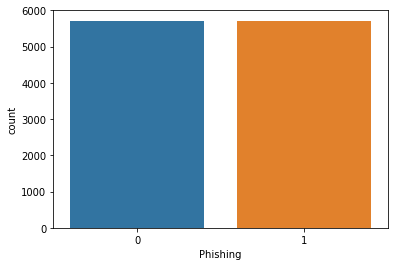

In [ ]:
# Checking the distribution of original dataset
sns.countplot(x=url['Phishing'])
print(url['Phishing'].value_counts())

In [ ]:
## Removing irrelevant columns (Columns with 0 and categorised as Phishing) that does not contribute to Phishing URLs

# Replace 0 with NaN, filter for phishing emails, then remove columns with all 0s 
clean_df = url.replace(0, np.nan)
temp = clean_df[clean_df['Phishing']==1].isna().sum()
irrelevant = temp[temp==len(clean_df[clean_df['Phishing']==1].isna())].index

In [ ]:
# Count of non-NaN values for the irrelevant columns 
clean_df[irrelevant].count()

nb_or                   0
ratio_nullHyperlinks    0
ratio_intRedirection    0
ratio_intErrors         0
submit_email            0
sfh                     0
dtype: int64

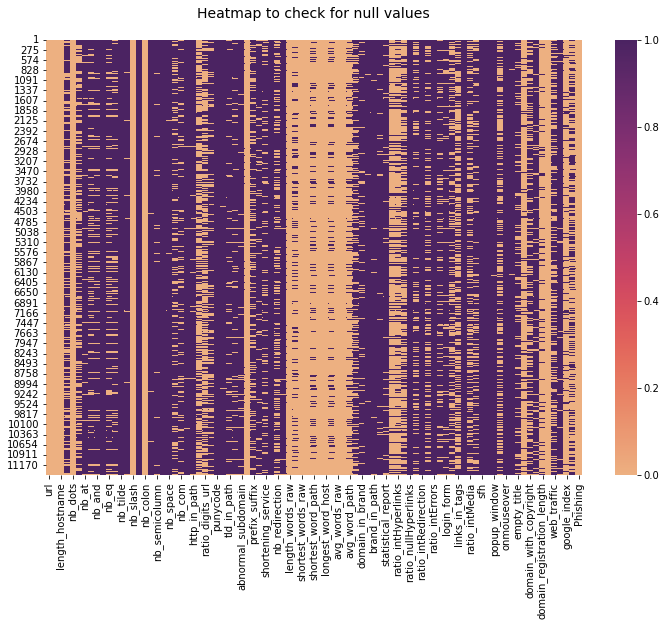

In [ ]:
# Visualising count of NaN values within dataset
fig, axes = plt.subplots(1,1, figsize=(12,8))
axes.set_title("Heatmap to check for null values\n", fontsize=14)
sns.heatmap(clean_df[clean_df['Phishing']==1].isna(), cmap='flare')

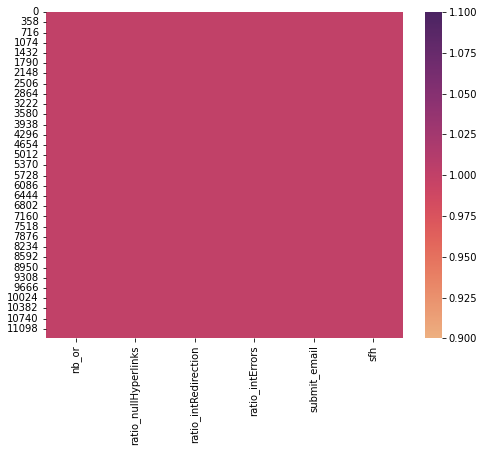

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(8,6))
sns.heatmap(clean_df[irrelevant].isna(), cmap='flare')

In [ ]:
# Drop irrelavant columns 
url.drop(irrelevant, axis=1, inplace=True)

google_index
page_rank
nb_www
ratio_digits_url
domain_in_title
nb_hyperlinks
phish_hints
domain_age
ip
nb_qm


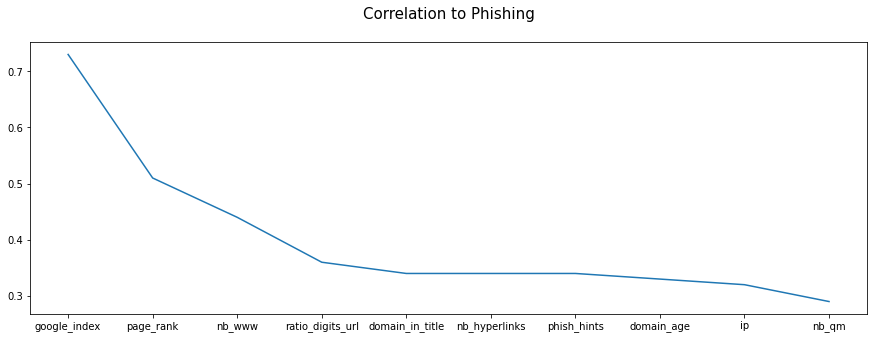

In [ ]:
## Visualising the top 10 most correlated variables to phishing emails 
corr_results = url.corr().abs().round(2)['Phishing'].sort_values(ascending=False).drop('Phishing')
for i in range(10):
  print(corr_results.index[i])
fig, axes = plt.subplots(1,1,figsize=(15,5))
axes.set_title("Correlation to Phishing\n", fontsize=15)
plt.plot(corr_results.head(10))

## 2.2 Principle Component Analysis (PCA) 

> **Purpose of PCA:** Outputs variables ordered by greatest influence on our target variable, Phishing (1 or 0).

We aimed to obtain 95% explained variance for our PCA and as a result, obtained 60 PCA components to use as our model inputs.

In [ ]:
# Importing key libraries for PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop URL links & target status 
drop_list = ['url', 'Phishing']
features = list(url.drop(drop_list, axis=1).columns)

# Standardise the data 
x = url.loc[:, features].values
y = url.loc[:, 'Phishing'].values
scaled_x = StandardScaler().fit_transform(x)

In [ ]:
## Visualising result from PCA 

# Checking min no. of principal component to retain 95% of the variance 
pca = PCA(.95)   
pca.fit(scaled_x)
n = pca.n_components_

# PCA Projection to n dimension
pca_x = pca.fit_transform(scaled_x)
pca_names = ['PCA_{x}'.format(x=num) for num in range(1,n+1)]
pca_url = pd.DataFrame(data=pca_x, columns=pca_names)

# Consolidating target 'status' with PCA values 
final_url = pd.concat([pca_url, url['Phishing']], axis=1)

Total Explained Variance: 95.07%


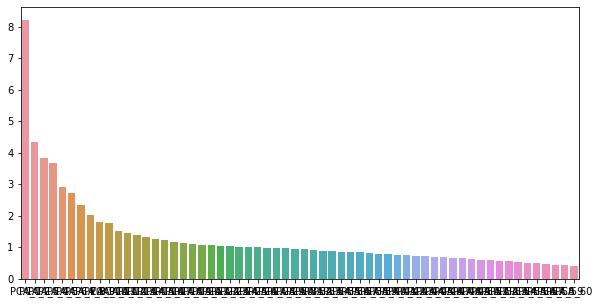

In [ ]:
## Explained Variance plot for 95% explained variance
f, axes = plt.subplots(1,1, figsize = (10, 5))
total = pca.explained_variance_ratio_.sum()*100

print("Total Explained Variance: {:.2f}%".format(total))
sns.barplot(x=pca_names, y=pca.explained_variance_)

In [ ]:
## Breakdown of each category of URL for the PCA components 
pca_breakdown = pd.DataFrame(abs(pca.components_), columns = features)

# Linear combination of variables to produce PCA components
pca_breakdown.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,0.293846,0.104818,0.219282,0.221594,0.079319,0.082489,0.228651,0.242022,0.262993,0.167457,...,0.040953,0.078704,0.009519,0.033128,0.031578,0.046385,0.053301,0.070693,0.140449,0.098139
1,0.053422,0.096843,0.024720,0.124206,0.046975,0.004416,0.023244,0.100563,0.082288,0.117204,...,0.153824,0.163643,0.096024,0.026770,0.043614,0.075028,0.036031,0.064358,0.171561,0.114899
2,0.000081,0.082684,0.086653,0.072497,0.068650,0.044997,0.011701,0.024298,0.014441,0.053393,...,0.048803,0.035239,0.022062,0.001909,0.088674,0.148153,0.126812,0.026468,0.016715,0.212718
3,0.184920,0.004040,0.032759,0.042200,0.112866,0.021217,0.069044,0.057990,0.075589,0.057554,...,0.157217,0.121338,0.073917,0.196956,0.152237,0.233162,0.020470,0.248048,0.150321,0.250878
4,0.050576,0.279118,0.018880,0.083933,0.035010,0.061811,0.069135,0.148133,0.137380,0.080102,...,0.176971,0.098548,0.099056,0.053932,0.062979,0.010682,0.120884,0.074238,0.012608,0.074717


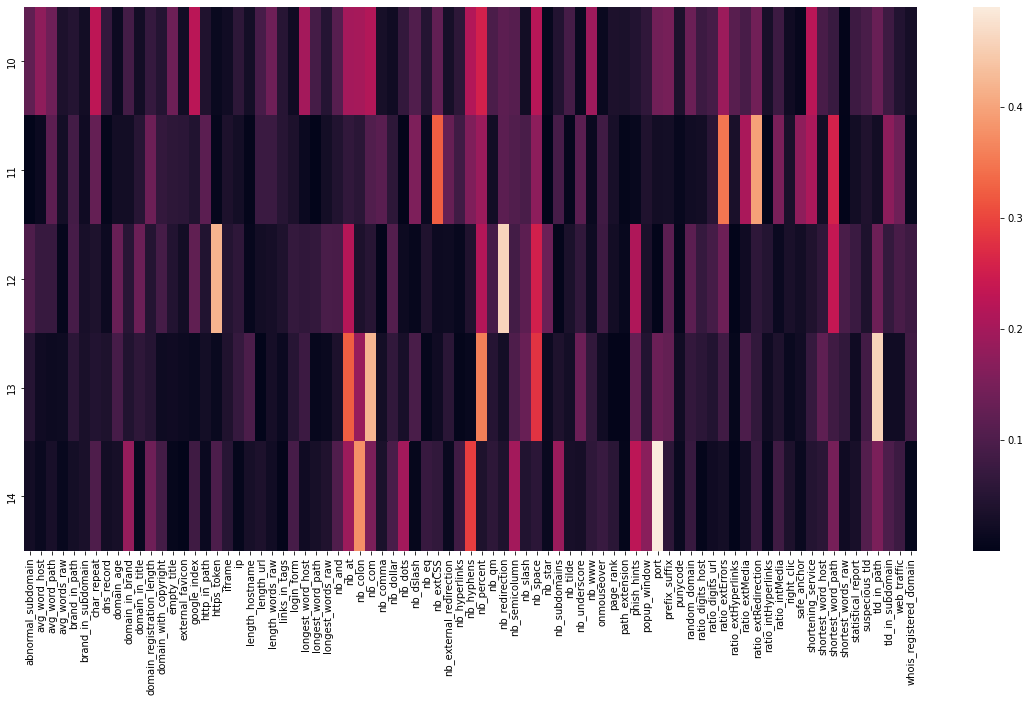

In [ ]:
## Visualising breakdown of PCA components based on input variables, sorted alphabetically 
col = list(pca_breakdown.columns)
col.sort()
arr_pca_breakdown = pca_breakdown[col]

f, axes = plt.subplots(1,1, figsize = (20, 10))
sns.heatmap(arr_pca_breakdown.iloc[10:15, :])

In [ ]:
## PCA Components Breakdown based on input variables 

def component_breakdown(index):
  temp = arr_pca_breakdown.iloc[index:index+1, :].transpose().sort_values(by=index, ascending = False)
  return temp.head()

lst = []

for component in range(0, 10):
  lst.append(component_breakdown(component).reset_index())

pd.concat(lst, axis=1)

,index,0,index,1,index,2,index,3,index,4,index,5,index,6,index,7,index,8,index,9
0,length_url,0.293846,avg_words_raw,0.316474,ratio_extHyperlinks,0.350830,ratio_digits_host,0.298250,avg_word_host,0.333365,ratio_digits_host,0.309988,length_hostname,0.359401,phish_hints,0.270380,web_traffic,0.252880,nb_www,0.376742
1,length_words_raw,0.289485,avg_word_host,0.293970,ratio_intHyperlinks,0.349135,abnormal_subdomain,0.255902,longest_word_host,0.322429,abnormal_subdomain,0.272010,nb_subdomains,0.341476,prefix_suffix,0.269083,nb_eq,0.244319,domain_in_brand,0.275735
2,nb_eq,0.262993,shortest_word_host,0.276051,links_in_tags,0.335958,page_rank,0.250878,avg_word_path,0.300408,empty_title,0.257484,shortest_word_host,0.297401,external_favicon,0.262666,nb_slash,0.232698,nb_dots,0.212747
3,nb_and,0.242022,longest_words_raw,0.233897,ratio_intMedia,0.262309,dns_record,0.248048,length_hostname,0.279118,dns_record,0.239190,http_in_path,0.249245,ratio_extMedia,0.247556,nb_and,0.230880,ratio_digits_url,0.207696
4,nb_qm,0.228651,ratio_intHyperlinks,0.229140,external_favicon,0.229570,statistical_report,0.245180,longest_word_path,0.273772,avg_words_raw,0.214595,tld_in_subdomain,0.218614,nb_slash,0.246752,longest_word_host,0.227055,domain_age,0.202730


### PCA Components Naming
<ol>
  <li> URL Length </li>
  <li> Avg Word Host Length</li>
  <li> Ext & Int Hyperlinks</li>
  <li> Page rank and Ratio Digit host</li>
  <li> Longest Word Host </li>
  <li> Abnormal Subdomain and Ratio Digit host</li>
  <li> Length of host name & Sub-domain</li>
  <li> Presence of Phish Hints and Prefix Suffix</li>
  <li> Web traffic </li>
  <li> Presence of "www" </li>
  <li> Google Index</li>
  <li> External Redirection</li>
  <li> HTTPS & No. of redirection</li>
  <li> Top Level Domain in path </li>
  <li> URL Port</li>
</ol>

### Visualisation of variable breakdown

In [ ]:
# After data cleaning 
print("Resulting number of columns: {x}".format(x=len(url.columns)))

# Breakdown for EDA
phish_url = url[url['Phishing']==1]
nonphish_url = url[url['Phishing']==0]

Resulting number of columns: 83


In [ ]:
def plot_vp(var):
  fig, axes = plt.subplots(2,1, sharex=True, figsize=(15,8))
  axes[0].set_title("Violin Plot for Phishing URLs")
  axes[1].set_title("Violin Plot for Non-phishing URLs")
  sns.violinplot(x=phish_url[var], ax=axes[0], color='red')
  sns.violinplot(x=nonphish_url[var], ax=axes[1])
  plt.show()

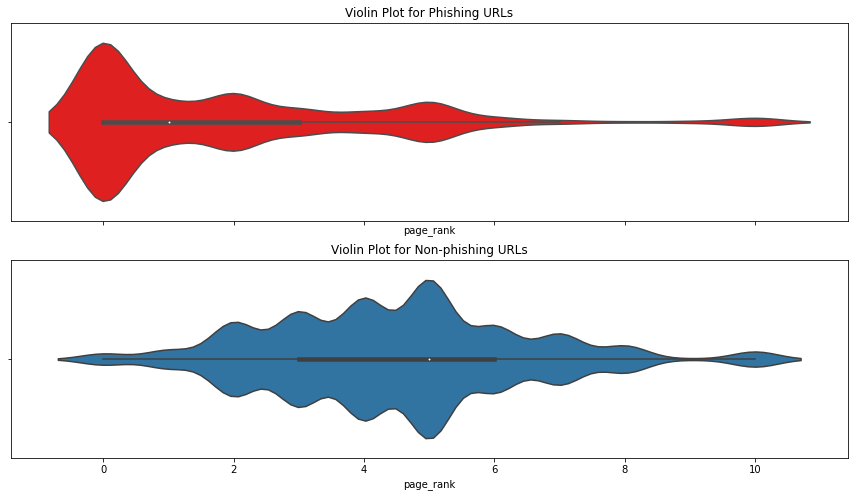

----------------------------------------------------------------------------------------------------------------


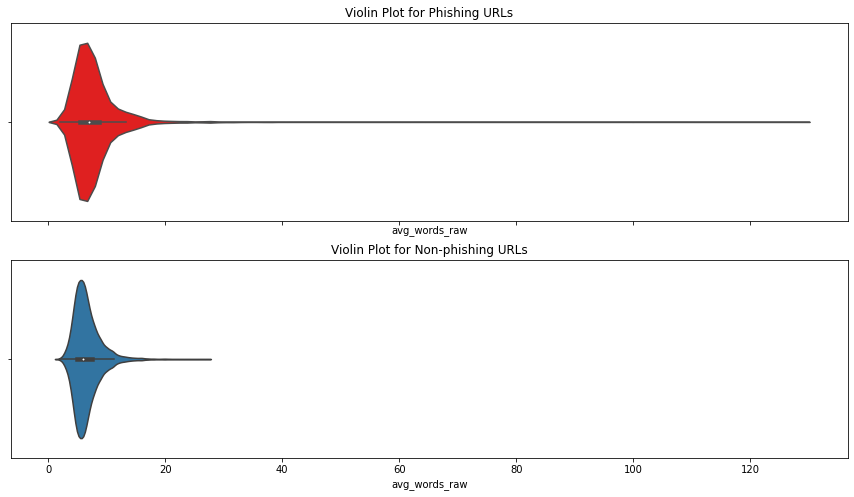

In [ ]:
plot_vp('page_rank')
print("----------------------------------------------------------------------------------------------------------------")
plot_vp('avg_words_raw')
print("----------------------------------------------------------------------------------------------------------------")
plot_vp('google_index')

# 3. Model Building and Evaluation
<ul> 
  <li> The ML models that we have selected are as follows: 
    <ol>
      <li> Decision Tree </li>
      <li> RandomForestClassifier </li>
      <li> Logistic Regression </li> 
    </ol>
  </li> 
</ul>

## ROUND 1
<ul> 
  <li> For our first model building, we will be training the model with the top 60 PCA components, then evaluating the performance of all 3 models to see which model has the best performance.
  </li>

---

In [ ]:
## Import relevant libraries

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Decision Tree/ Random Forest
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# Logistics Regression/ SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

### 3.1 Decision Tree
<ul>
  <li> For our decision tree, we used max_depth = 3 as our initial parameter and ran our model inputs.
  </li> 
  <li> However, we realized that our model gave a relatively high False Negative rate. This would be detrimental as we would want to reduce incorrectly classifying URL as non-phishing. 
  </li>
  <li>Therefore, we decided to implement Random Forests Classifier to improve on this model. 
  </li>
</ul> 

In [ ]:
## Data Preparation (Model Building)
X = final_url.iloc[:,:-1]
y = final_url['Phishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training 
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

Model Evaluation (Decision Tree)
   Accuracy (in %): 85.86%
   Precision (in %): 88.54%
   F1-score (in %): 85.63

Metrics for Predicted (Test Data)
   True Positive Rate: 82.9%
   False Positive Rate: 11.09%
   False Negative Rate: 17.1%

Cross-validation Score:
0.845 accuracy with a standard deviation of 0.0077



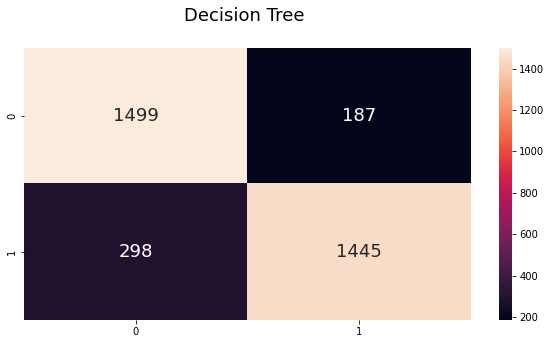

In [ ]:
## Model Evaluation 

# Confusion Matrix
f, axes = plt. subplots(1,1, figsize = (10,5))
dt_cm = confusion_matrix(y_test, dt_pred)
axes.axes.set_title("Decision Tree \n", fontsize=18)
sns.heatmap(dt_cm, annot = True, fmt = ".0f", annot_kws={'size' :18})

TN = dt_cm[0][0]
FP = dt_cm[0][1]
FN = dt_cm[1][0]
TP = dt_cm[1][1]

## Metrics Calculation
dt_acc_1 = accuracy_score(y_test, dt_pred)*100
dt_prec_1 = precision_score(y_test, dt_pred)*100
dt_f1score_1 = f1_score(y_test, dt_pred)*100

# Include precision & F1-score 
print("Model Evaluation (Decision Tree)")
print("   Accuracy (in %): {:.2f}%".format(dt_acc_1))
print("   Precision (in %): {:.2f}%".format(dt_prec_1))
print("   F1-score (in %): {:.2f}\n".format(dt_f1score_1))

# Include breakdown 
print("Metrics for Predicted (Test Data)")
print("   True Positive Rate: {x}%".format(x=round(100*TP/(TP+FN), 2)))
print("   False Positive Rate: {x}%".format(x=round(100*FP/(TN+FP), 2)))
print("   False Negative Rate: {x}%\n".format(x=round(100*FN/(TP+FN), 2)))

# Cross-validation 
scores=cross_val_score(dt, X, y, cv=5)
print("Cross-validation Score:")
print("%0.3f accuracy with a standard deviation of %0.4f\n" % (scores.mean(), np.std(scores)))

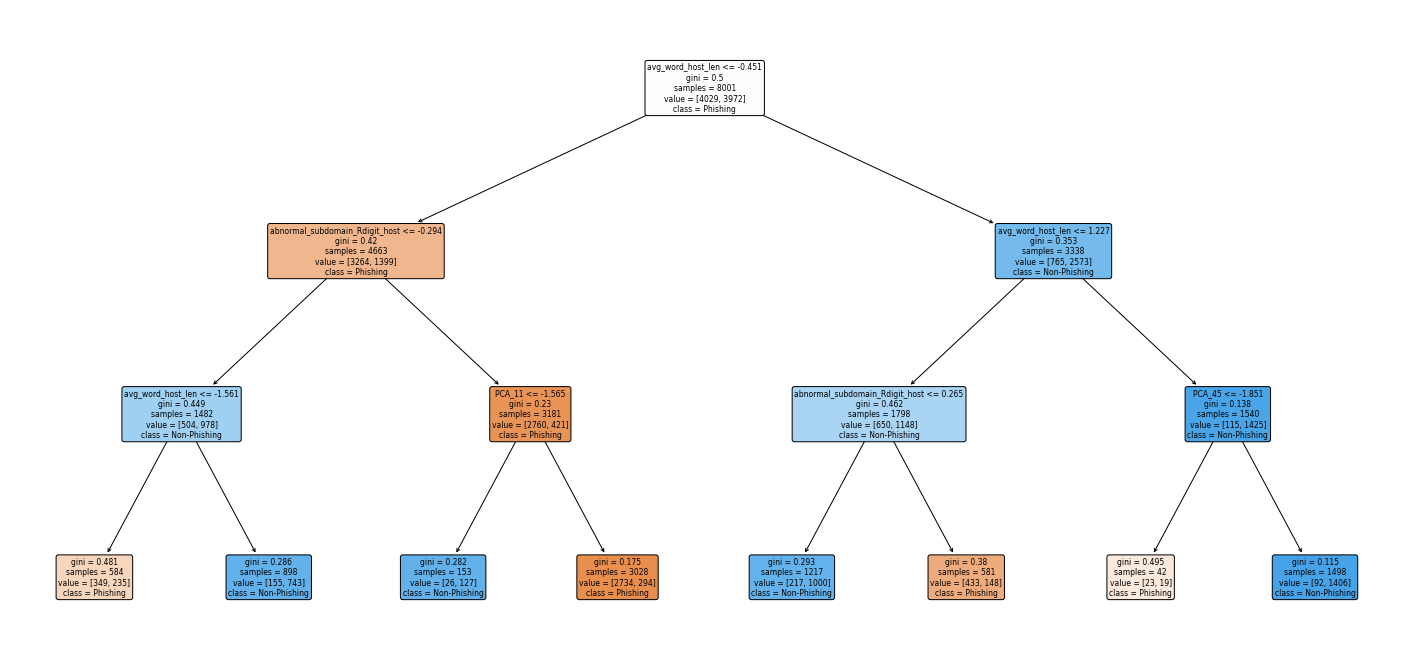

In [ ]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(25,12))
plot_tree(dt, filled=True, rounded=True, 
          class_names=['Phishing', 'Non-Phishing'], 
          feature_names = final_url.columns)
plt.show()

#### Improving on Decision Tree
<ul> 
  <li> We wanted to improve on our Decision Tree's classification performance by tuning the hyperparameters of max_depth and criterion.
  </li>
  <li> We deem the best parameters to be criterion = entropy and max_depth = 7 based on the calculations below.
  </li>
</ul>

In [ ]:
print("Initial accuracy= {:.2f}%".format(100*accuracy_score(y_test, dt_pred)))

dtree = DecisionTreeClassifier(criterion='gini') 
dtree.fit(X_train, y_train)
dt_pred = dtree.predict(X_test)
print('Criterion = gini {:.2f}%'.format(100*accuracy_score(y_test, dt_pred)))

dtree = DecisionTreeClassifier(criterion='entropy') 
dtree.fit(X_train, y_train)
dt_pred = dtree.predict(X_test)
print('Criterion = entropy {:.2f}%'.format(100*accuracy_score(y_test, dt_pred)))

Initial accuracy= 84.66%
Criterion = gini 89.94%
Criterion = entropy 90.08%


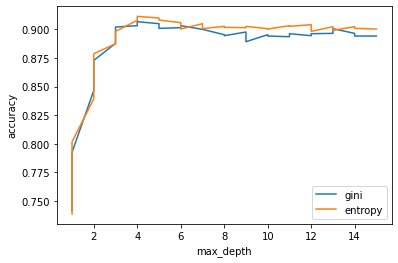

In [ ]:
max_depth =[]
acc_gini =[]
acc_entropy=[]
for i in range (1,30):
  dtree = DecisionTreeClassifier(criterion='gini', max_depth=i) 
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  acc_gini.append(accuracy_score(y_test, pred))
  max_depth.append(i)
#####
  dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  acc_entropy.append(accuracy_score(y_test, pred))
#####
  max_depth.append(i) 

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# Visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
# Visualising max values
print("Max depth for highest entropy: {x}, {y}%".format(x=acc_entropy.index(max(acc_entropy)), y=round(100*max(acc_entropy),2)))
print("Max depth for highest gini: {x}, {y}%".format(x=acc_gini.index(max(acc_gini)), y=round(100*max(acc_gini),2)))

Max depth for highest entropy: 7, 91.13%
Max depth for highest gini: 7, 90.67%


### 3.2 Random Forest 
<ul> 
  <li> We tested out Random Forest Classifier, which creates multiple Decision Trees and takes the majority votes for classification. 
  </li> 
  <li> From our results, we successfully reduced the False Negative rates as well as obtained a higher classification accuracy. 
  </li>
</ul>

In [ ]:
## Data Preparation (Model Building)
size = len(final_url.columns)-1
X = final_url.iloc[:,0:size]
y = final_url.iloc[:,size]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training 
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

Model Evaluation (Random Forest)
   Accuracy (in %): 95.16%
   Precision (in %): 94.82%
   F1-score (in %): 95.21

Metrics for Predicted (Test Data)
   True Positive Rate: 95.59%
   False Positive Rate: 5.28%
   False Negative Rate: 4.41%

Cross-validation Score:
0.950 accuracy with a standard deviation of 0.0032



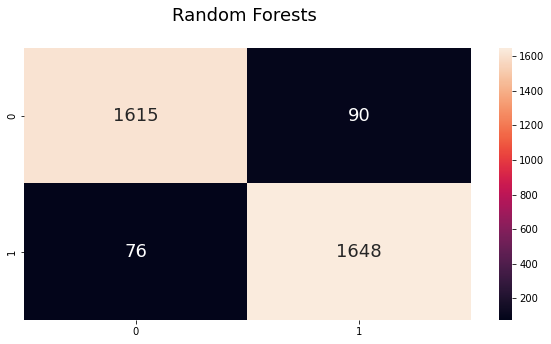

In [ ]:
## Model Evaluation 

# Confusion Matrix
f, axes = plt. subplots(1,1, figsize = (10, 5))
rfc_cm = confusion_matrix(y_test, rfc_pred)
axes.axes.set_title("Random Forests \n", fontsize=18)
sns.heatmap(rfc_cm, annot = True, fmt = ".0f", annot_kws={'size' :18})

## Metrics Calculation
rfc_acc_1 = accuracy_score(y_test, rfc_pred)*100
rfc_prec_1 = precision_score(y_test, rfc_pred)*100
rfc_f1score_1 = f1_score(y_test, rfc_pred)*100

TN = rfc_cm[0][0]
FP = rfc_cm[0][1]
FN = rfc_cm[1][0]
TP = rfc_cm[1][1]

# Include precision & F1-score 
print("Model Evaluation (Random Forest)")
print("   Accuracy (in %): {:.2f}%".format(rfc_acc_1))
print("   Precision (in %): {:.2f}%".format(rfc_prec_1))
print("   F1-score (in %): {:.2f}\n".format(rfc_f1score_1))

# Include breakdown 
print("Metrics for Predicted (Test Data)")
print("   True Positive Rate: {x}%".format(x=round(100*TP/(TP+FN), 2)))
print("   False Positive Rate: {x}%".format(x=round(100*FP/(TN+FP), 2)))
print("   False Negative Rate: {x}%\n".format(x=round(100*FN/(TP+FN), 2)))

# Cross-validation 
scores=cross_val_score(rfc, X, y, cv=5)
print("Cross-validation Score:")
print("%0.3f accuracy with a standard deviation of %0.4f\n" % (scores.mean(), np.std(scores)))

#### Cross Validation for Random Forest
<ul> 
  <li>We used GridSearchCV for our hyperparameter tuning to further improve on our model and obtained the following parameters. 
  </li>
</ul>

In [ ]:
## Data Preparation (Model Building)
size = len(final_url.columns)-1
X = final_url.iloc[:,0:size]
y = final_url.iloc[:,size]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
## Conducting GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth' : [2,4,6,8,10,12]}
              
grid = GridSearchCV(RandomForestClassifier(), param_grid, verbose=3, n_jobs=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=3)

In [ ]:
# Result of GridSearchCV \
print(grid.best_params_)
print("These parameters achieved an accuracy of {}%".format(round(grid.best_score_*100,2)))

{'criterion': 'entropy', 'max_depth': 12}
These parameters achieved an accuracy of 94.33%


### 3.3 LogisticRegression
<ul> 
  <li> We conducted Logistics Regression to model the probability of the discrete dependent variable (Phishing) based on the given variables.
  </li> 
  <li> We assumed that there is a linear relationship between the URL features and the response variable (phishing URL). 

</ul>


In [ ]:
# Normalizing data for LogisticsRegression
scaler = StandardScaler()
n = scaler.fit_transform(final_url)
norm_url = pd.DataFrame(n, columns = final_url.columns)

# Train_test_split the data
X = norm_url.iloc[:, :-1]
y = norm_url['Phishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
## Testing out Logistics Regression 
lm = LogisticRegression(max_iter=500)
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)

# Confusion Matrix
lm_cm = confusion_matrix(y_test, lm_pred)

TN = lm_cm[0][0]
FP = lm_cm[0][1]
FN = lm_cm[1][0]
TP = lm_cm[1][1]

# Metrics Calculation
lm_acc_1 = accuracy_score(y_test, lm_pred)*100
lm_prec_1 = precision_score(y_test, lm_pred)*100
lm_f1score_1 = f1_score(y_test, lm_pred)*100

In [ ]:
# Model Evaluation (LM)
print("Model Evaluation (Logistic Regression)")
print("   Accuracy (in %): {:.2f}%".format(lm_acc_1))
print("   Precision (in %): {:.2f}%".format(lm_prec_1))
print("   F1-score (in %): {:.2f}%\n".format(lm_f1score_1))

# Include breakdown 
print("Metrics for Predicted (Test Data)")
print("   True Positive Rate: {x}%".format(x=round(100*TP/(TP+FN), 2)))
print("   False Positive Rate: {x}%".format(x=round(100*FP/(TN+FP), 2)))
print("   False Negative Rate: {x}%\n".format(x=round(100*FN/(TP+FN), 2)))

## Cross-validation 
scores=cross_val_score(lm, X, y, cv=5)
print("Cross-validation Score:")
print("%0.3f accuracy with a standard deviation of %0.4f" % (scores.mean(), np.std(scores)))

Model Evaluation (Logistic Regression)
   Accuracy (in %): 94.60%
   Precision (in %): 94.79%
   F1-score (in %): 94.65%

Metrics for Predicted (Test Data)
   True Positive Rate: 94.51%
   False Positive Rate: 5.3%
   False Negative Rate: 5.49%

Cross-validation Score:
0.943 accuracy with a standard deviation of 0.0031


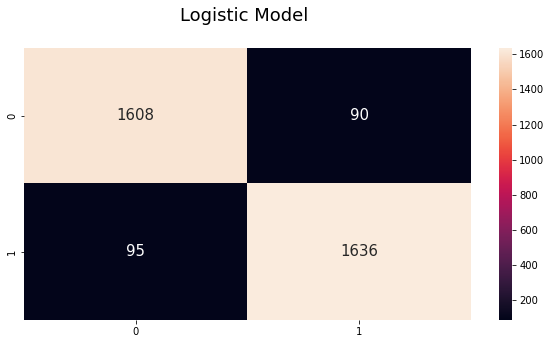

In [ ]:
# Visualising confusion matrices
f, axes = plt.subplots(1,1, figsize = (10, 5))
axes.axes.set_title("Logistic Model \n", fontsize=18)
sns.heatmap(lm_cm, annot = True, fmt = ".0f", annot_kws={'size' :15}, ax=axes)
plt.show()

# 4. Improving Model Performance
<ul> 
  <li>We achieved good results from using PCA components as our model inputs, but there was still inaccuracies in the model's performance.
  </li>
  <li> From our initial EDA, we noticed that certain variables (i.e. google_index, page_rank) were correlated to phishing emails, therefore we sought to use Feature Selection from our original dataset and include them into our model inputs.
  </li>
</ul>

## Feature Selection 
<ul>
  <li> From our RandomForestClassifier model, we performed Feature Selection to rank variables based on feature importance, and we decided to add the top 8 features into our model inputs. We hypothesized that by adding these weights, we could achieve a better overall prediction accuracy and precision.
  </li> 
</ul> 

In [ ]:
## Performing RFC on original URL dataset 

# Data Preparation for URL dataset
features = list(url.drop(drop_list, axis=1).columns)
drop_list = ['url', 'Phishing']

X = url.loc[:, features].values
y = url.loc[:, 'Phishing'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training 
rfc_FI = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc_FI.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

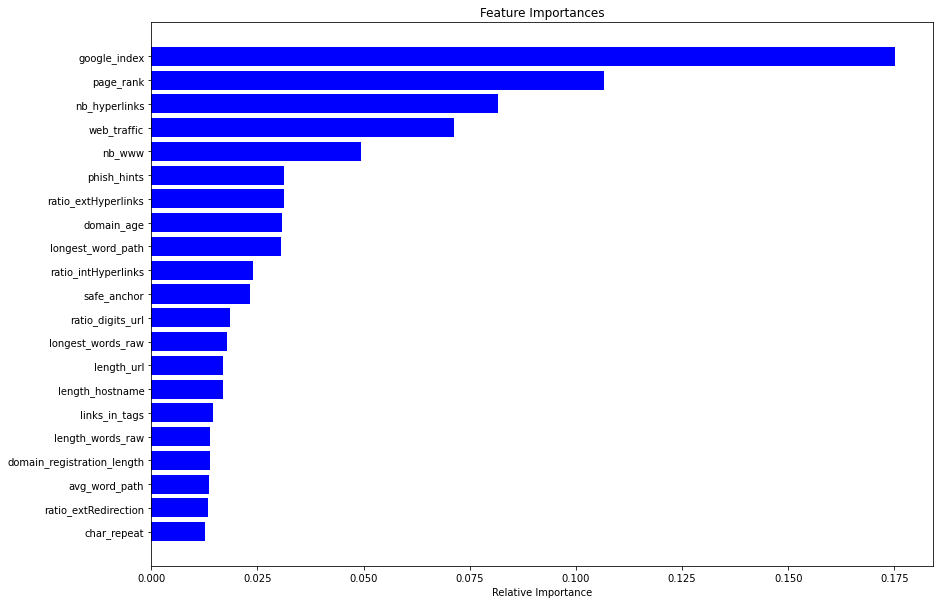

In [ ]:
# Selecting feature importance
importances = rfc_FI.feature_importances_
indices = np.argsort(importances)[60:81]
# indices = np.argsort(importances) ## Displays the feature importance for all variables

# Plotting horizontal barchart for top features 
plt.figure(figsize=(14,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### EDA for Feature Importance
Looking at the chart for Feature Importance, we decided to conduct EDA on the top 8 variables (Highest Influence on target variable).

In [ ]:
# View the top 10 variables of Feature Importance
fi = [features[i] for i in indices]
fi_result = []

for i in fi[:len(fi)-11:-1]:
  fi_result.append(i)
  print(i)

google_index
page_rank
nb_hyperlinks
web_traffic
nb_www
phish_hints
ratio_extHyperlinks
domain_age
longest_word_path
ratio_intHyperlinks


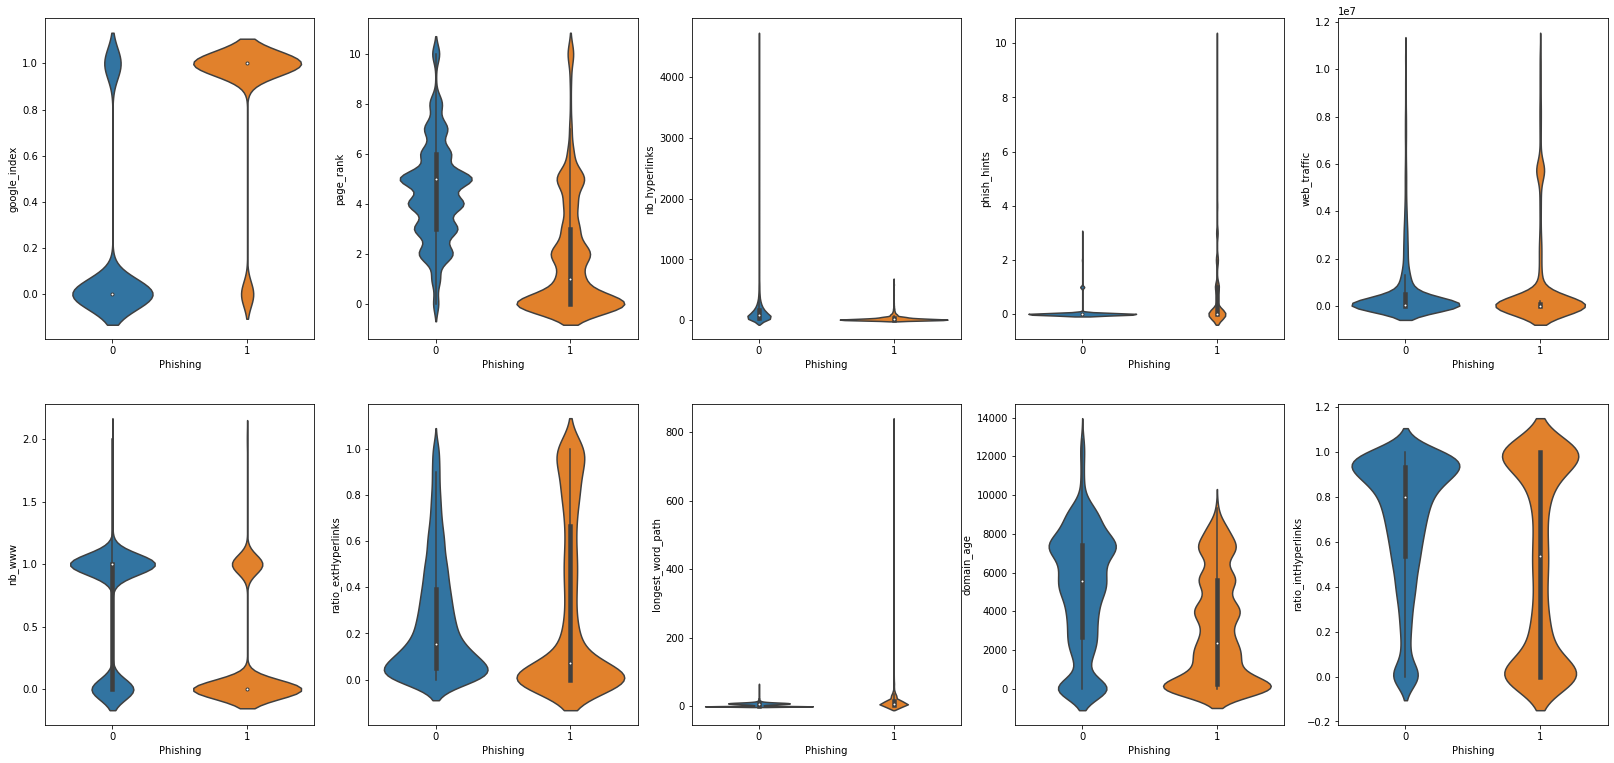

In [ ]:
## Visualising the top 8 selected variables from Feature Selection 

fig, axes = plt.subplots(2,5, figsize = (28,13))

sns.violinplot(x=url['Phishing'], y=url['google_index'], ax = axes[0,0])
sns.violinplot(x=url['Phishing'], y=url['page_rank'], ax = axes[0,1])
sns.violinplot(x=url['Phishing'], y=url['nb_hyperlinks'], ax = axes[0,2])
sns.violinplot(x=url['Phishing'], y=url['phish_hints'], ax = axes[0,3])
sns.violinplot(x=url['Phishing'], y=url['web_traffic'], ax = axes[0,4])

sns.violinplot(x=url['Phishing'], y=url['nb_www'], ax = axes[1,0])
sns.violinplot(x=url['Phishing'], y=url['ratio_extHyperlinks'], ax = axes[1,1])
sns.violinplot(x=url['Phishing'], y=url['longest_word_path'], ax = axes[1,2])
sns.violinplot(x=url['Phishing'], y=url['domain_age'], ax = axes[1,3])
sns.violinplot(x=url['Phishing'], y=url['ratio_intHyperlinks'], ax = axes[1,4])

### Data Preparation for Model Building
<ul> 
  <li> Based on our observation from EDA, we selected the top 8 variables due to their distinct differences between Phishing and non-phishing emails, which could help in classifying our target variables. 
  </li>
</ul> 

Outputs: final_url_2 



In [ ]:
## Extracting relevant variables and joining to original final_url dataset

# Exclude the following columns due to inability to differentiate phishing and non-phishing
remove = ['ratio_extHyperlinks', 'web_traffic']
clean_fi_result = []
for item in fi_result:
  if item not in remove: 
    clean_fi_result.append(item)

# Create final_url_2 data inputs
fi_variables = url[clean_fi_result]

final_url_2 = final_url.join(fi_variables)
final_url_2.drop('Phishing', axis=1, inplace = True)
final_url_2['Phishing'] = final_url['Phishing']

## ROUND 2
<ul>
  <li> For our second model building, we included the variables from Feature Selection to test if we can obtain a better performance for our models.
  </li>
  <li> We keep our model parameters constant to ensure consistency in our results, since we want to evaluate if the addition of important variables will improve the model performance.
  </li>
</ul>

---

### 4.1 Decision Tree

In [ ]:
## Data Preparation (Model Building)
X = final_url_2.iloc[:,:-1]
y = final_url_2['Phishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training 
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

Model Evaluation (Decision Tree)
   Accuracy (in %): 91.05%
   Precision (in %): 91.69%
   F1-score (in %): 91.13

Metrics for Predicted (Test Data)
   True Positive Rate: 90.58%
   False Positive Rate: 8.47%
   False Negative Rate: 9.42%

Cross-validation Score:
0.917 accuracy with a standard deviation of 0.0018



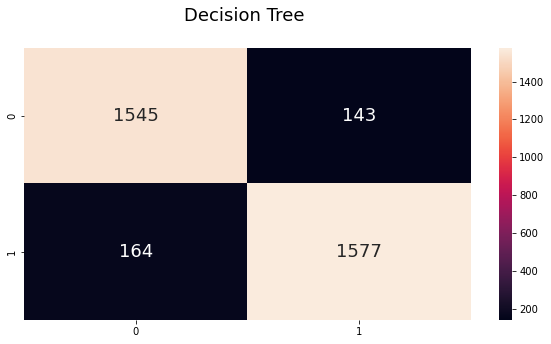

In [ ]:
## Model Evaluation 

# Confusion Matrix
f, axes = plt. subplots(1,1, figsize = (10, 5))
dt_cm = confusion_matrix(y_test, dt_pred)
axes.axes.set_title("Decision Tree \n", fontsize=18)
sns.heatmap(dt_cm, annot = True, fmt = ".0f", annot_kws={'size' :18})

## Metrics Calculation
dt_acc_2 = accuracy_score(y_test, dt_pred)*100
dt_prec_2 = precision_score(y_test, dt_pred)*100
dt_f1score_2 = f1_score(y_test, dt_pred)*100

TN = dt_cm[0][0]
FP = dt_cm[0][1]
FN = dt_cm[1][0]
TP = dt_cm[1][1]

# Include precision & F1-score 
print("Model Evaluation (Decision Tree)")
print("   Accuracy (in %): {:.2f}%".format(dt_acc_2))
print("   Precision (in %): {:.2f}%".format(dt_prec_2))
print("   F1-score (in %): {:.2f}\n".format(dt_f1score_2))

# Include breakdown 
print("Metrics for Predicted (Test Data)")
print("   True Positive Rate: {x}%".format(x=round(100*TP/(TP+FN), 2)))
print("   False Positive Rate: {x}%".format(x=round(100*FP/(TN+FP), 2)))
print("   False Negative Rate: {x}%\n".format(x=round(100*FN/(TP+FN), 2)))

# Cross-validation 
scores=cross_val_score(dt, X, y, cv=5)
print("Cross-validation Score:")
print("%0.3f accuracy with a standard deviation of %0.4f\n" % (scores.mean(), np.std(scores)))

### 4.2 Random Forest

In [ ]:
## Data Preparation (Model Building)
size = len(final_url_2.columns)-1
X = final_url_2.iloc[:,0:size]
y = final_url_2.iloc[:,size]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training 
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

Model Evaluation (Random Forest)
   Accuracy (in %): 95.92%
   Precision (in %): 95.45%
   F1-score (in %): 95.95

Metrics for Predicted (Test Data)
   True Positive Rate: 90.58%
   False Positive Rate: 8.47%
   False Negative Rate: 9.42%

Cross-validation Score:
0.961 accuracy with a standard deviation of 0.0037



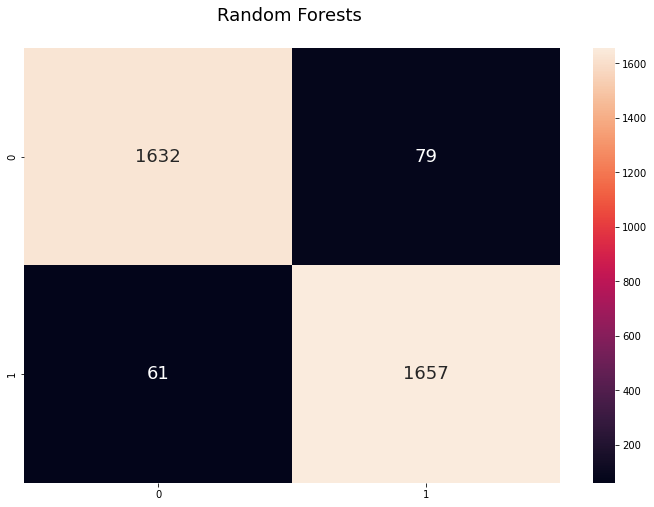

In [ ]:
## Model Evaluation 

# Confusion Matrix
f, axes = plt. subplots(1,1, figsize = (12, 8))
rfc_cm = confusion_matrix(y_test, rfc_pred)
axes.axes.set_title("Random Forests \n", fontsize=18)
sns.heatmap(rfc_cm, annot = True, fmt = ".0f", annot_kws={'size' :18})

## Metrics Calculation
rfc_acc_2 = accuracy_score(y_test, rfc_pred)*100
rfc_prec_2 = precision_score(y_test, rfc_pred)*100
rfc_f1score_2 = f1_score(y_test, rfc_pred)*100

TN = dt_cm[0][0]
FP = dt_cm[0][1]
FN = dt_cm[1][0]
TP = dt_cm[1][1]

# Include precision & F1-score 
print("Model Evaluation (Random Forest)")
print("   Accuracy (in %): {:.2f}%".format(rfc_acc_2))
print("   Precision (in %): {:.2f}%".format(rfc_prec_2))
print("   F1-score (in %): {:.2f}\n".format(rfc_f1score_2))

# Include breakdown 
print("Metrics for Predicted (Test Data)")
print("   True Positive Rate: {x}%".format(x=round(100*TP/(TP+FN), 2)))
print("   False Positive Rate: {x}%".format(x=round(100*FP/(TN+FP), 2)))
print("   False Negative Rate: {x}%\n".format(x=round(100*FN/(TP+FN), 2)))

# Cross-validation 
scores=cross_val_score(rfc, X, y, cv=5)
print("Cross-validation Score:")
print("%0.3f accuracy with a standard deviation of %0.4f\n" % (scores.mean(), np.std(scores)))

### 4.3 Logistic Regression

In [ ]:
# Normalizing data for LogisticsRegression/ SVM
scaler = MinMaxScaler()
n = scaler.fit_transform(final_url_2)
norm_url = pd.DataFrame(n, columns = final_url_2.columns)

# Train_test_split the data
size = len(norm_url.columns)-1
X = norm_url.iloc[:, 0:size]
y = norm_url.iloc[:, size]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
## Testing out Logistics Regression 
lm = LogisticRegression(max_iter = 500)
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)

# Confusion Matrix
lm_cm = confusion_matrix(y_test, lm_pred)

# Metrics Calculation
lm_acc_2 = accuracy_score(y_test, lm_pred)*100
lm_prec_2 = precision_score(y_test, lm_pred)*100
lm_f1score_2 = f1_score(y_test, lm_pred)*100

TN = lm_cm[0][0]
FP = lm_cm[0][1]
FN = lm_cm[1][0]
TP = lm_cm[1][1]

In [ ]:
# Model Evaluation (LM)
print("Model Evaluation (Logistic Regression)")
print("   Accuracy (in %): {:.2f}%".format(lm_acc_2))
print("   Precision (in %): {:.2f}%".format(lm_prec_2))
print("   F1-score (in %): {:.2f}%\n".format(lm_f1score_2))

# Include breakdown 
print("Metrics for Predicted (Test Data)")
print("   True Positive Rate: {x}%".format(x=round(100*TP/(TP+FN), 2)))
print("   False Positive Rate: {x}%".format(x=round(100*FP/(TN+FP), 2)))
print("   False Negative Rate: {x}%\n".format(x=round(100*FN/(TP+FN), 2)))

# Cross-validation 
scores=cross_val_score(lm, X, y, cv=5)
print("Cross-validation Score:")
print("%0.3f accuracy with a standard deviation of %0.4f\n" % (scores.mean(), scores.std()))

Model Evaluation (Logistic Regression)
   Accuracy (in %): 93.00%
   Precision (in %): 92.99%
   F1-score (in %): 92.94%

Metrics for Predicted (Test Data)
   True Positive Rate: 92.88%
   False Positive Rate: 6.88%
   False Negative Rate: 7.12%

Cross-validation Score:
0.932 accuracy with a standard deviation of 0.0057



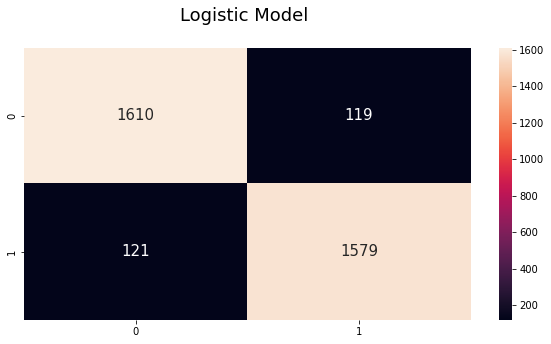

In [ ]:
# Visualising confusion matrices
f, axes = plt.subplots(1,1, figsize = (10, 5))
axes.axes.set_title("Logistic Model \n", fontsize=18)
sns.heatmap(lm_cm, annot = True, fmt = ".0f", annot_kws={'size' :15}, ax=axes)
plt.show()

# 5. Model Comparison & Emsembling



## 5.1 Model Consolidation & Comparison
<ul> 
  <li> After running both rounds of model training for all 3 models, we consolidated the metrics into a dataframe for analysis.
  </li>
</ul>

**Deductions from consolidating results:**
<ul> 
  <li> After including the variables from feature selection, we realized that the model performances improved for Decision Trees and Random Forest, whereas it performed poorer for Logistic Regression (accuracy & f1-score). Generally, performance improved with the new model inputs.
  </li>
  <li> We decided to perform ensembling to combine the classification decisions from these models into a final model, to improve the overall model performance.
</ul>

In [ ]:
## Metrics Comparison 

metrics = ['Accuracy', 'Precision', 'F1-score']

# Logistic Regression
consolidated_metrics = [[ dt_acc_1, dt_prec_1, dt_f1score_1], [dt_acc_2, dt_prec_2, dt_f1score_2],
                        [ rfc_acc_1, rfc_prec_1, rfc_f1score_1], [rfc_acc_2, rfc_prec_2, rfc_f1score_2],
                        [ lm_acc_1, lm_prec_1, lm_f1score_1], [lm_acc_2, lm_prec_2, lm_f1score_2]]

# consolidated_metrics = np.transpose(consolidated_metrics)

tuples = [('Decision Tree', 'Round 1'), ('Decision Tree', 'Round 2'),
          ('Random Forest', 'Round 1'), ('Random Forest', 'Round 2'),
          ('Logistic Model', 'Round 1'), ('Logistic Model', 'Round 2')]

index = pd.MultiIndex.from_tuples(tuples, names=['Model', 'Round'])

comparison_results = pd.DataFrame(consolidated_metrics, index = index, columns=metrics)
comparison_results = np.transpose(comparison_results)

comparison_results

Model     Decision Tree            Random Forest            Logistic Model  \
Round           Round 1    Round 2       Round 1    Round 2        Round 1   
Accuracy      84.660251  91.046952     95.158938  95.917177      94.604841   
Precision     86.121212  91.686047     94.821634  95.449309      94.785632   
F1-score      84.382423  91.129731     95.205084  95.946728      94.648539   

Model                 
Round        Round 2  
Accuracy   93.000875  
Precision  92.991755  
F1-score   92.937022

## 5.2 Ensembling of ML Models 
<ul> 
  <li> We then sought to ensemble the 3 ML models using hard voting method.
  </li>
  <li> We also included our parameters from GridSearchCV to further enhance the accuracy of our models. 
  </li>
</ul> 

In [ ]:
from sklearn.ensemble import VotingClassifier

dt = DecisionTreeClassifier(max_depth = 7, criterion = 'entropy')
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth = 12, criterion = 'entropy')
lm = LogisticRegression(max_iter = 500)

# Conduct Voting Ensembling 
ensem = VotingClassifier(estimators=[('DT', dt), ('RFC', rfc), ('LR', lm)], voting='hard')
ensem.fit(X_train,y_train)
ensem_pred = ensem.predict(X_test)

final_acc = accuracy_score(y_test, ensem_pred)*100
final_prec = precision_score(y_test, ensem_pred)*100
final_f1score = f1_score(y_test, ensem_pred)*100

print("After conducting ensembling, our final model achieved the following results: \n")
print("Model Evaluation (Ensembling of 3 models)")
print("   Accuracy (in %): {:.2f}%".format(final_acc))
print("   Precision (in %): {:.2f}%".format(final_prec))
print("   F1-score (in %): {:.2f}%\n".format(final_f1score))

After conducting ensembling, our final model achieved the following results: 

Model Evaluation (Ensembling of 3 models)
   Accuracy (in %): 95.28%
   Precision (in %): 95.50%
   F1-score (in %): 95.22%



# 6. Conclusion
<ul>
  <li> At the end of this project, we managed to build a model with 95.28% classification accuracy through ensembling of the 3 given models. 
  </li>
  <li> Through this mini-project, we learnt the following lessons: 
  </li>
    <ol> 
      <li> How to use PCA to reduce dimensionality of the dataset to tackle curse of dimensionality </li> 
      <li> Hyperparameter tuning using GridSearchCV </li>
      <li> Ensembling of different models to obtain the aggregated result to improve model performance. </li>
    </ol>
</ul> 

<br> 

---

## Thank you!! 
Cheers to staying with us till the end & 
Creds to Goh Chen Yu, our lovely TA :D